In [6]:
from tensorflow.keras.datasets import mnist  # mnist 데이터셋
import tensorflow.keras.utils as utils #원핫인코딩
from tensorflow.keras.models import Sequential #모델
from tensorflow.keras.layers import Dense, Activation # Layer add 
from matplotlib import pyplot as plt 
import numpy as np
np.random.seed(3)


# < 1> 데이터 전처리

In [3]:
# 1. 데이터 셋 준비하기 
# 훈련셋, 검증셋 분리 
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()    # X_train 독립변수, Y_train 종속변수  #mnist는 패키지안에 들어있다
                                                           # mnist.load_data() == 알아서 나눠서 출력하는 메소드 

In [4]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape  #60000면 28행 28열   

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

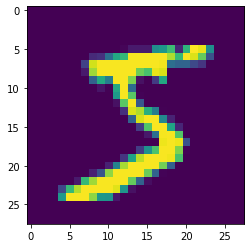

In [7]:
plt.imshow(X_train[0])  #위에서 숫자 있는게 여기서 노랑부분

In [8]:
#결과는 Y_train에 있다.  컴퓨터에게 위위 데이터를 알려줌
Y_train[0]

5

In [9]:
# 훈련셋과 검증셋 분리  (X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]  #50000개부터 끝까지 
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [10]:
# 훈련셋 - 학습할 때 사용      (accuracy높고,loss가 낮고)
X_train.shape, Y_train.shape

((50000, 28, 28), (50000,))

In [11]:
# 검증셋 - 학습할 때 사용 
len(X_val),len(Y_val)

(10000, 10000)

In [12]:
# 훈련셋 - 모델 평가할 때 사용 
len(X_test), len(Y_test)

(10000, 10000)

결국 2줄

In [ ]:
# 훈련셋, 검증셋 분리 
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()   

X_val = X_train[50000:]  #50000개부터 끝까지 
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

## normalize하기 위해 색상값으로 나눔

In [13]:
X_train = X_train.reshape(50000,784).astype('float32')/255.0    #28x28=784********************
X_val = X_val.reshape(10000,784).astype('float32')/255.0  # '데이터 784개' 한꺼번에 1차원으로 들어가  *******************************************
X_test = X_test.reshape(10000,784).astype('float32')/255.0    #255.0는 색상값 


In [14]:
X_train.shape, X_val.shape, X_test.shape

((50000, 784), (10000, 784), (10000, 784))

In [20]:
# 훈련셋과 검증셋 700개, 300개씩만 가져옴 
#1부터50000까지 700개를 random하게 뽑자
train_rand_idxs = np.random.choice(50000,700) #50000개중 700개를 뽑음
val_rand_idxs = np.random.choice(10000,300)  #10000개 중 300개를 뽑아라   0부터99999까지 300개의 수   random.choice를 쓴 이유: 중복되면 안됨
                                                #학습하는데 시간 줄여볼려고
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

#300개의 index만 사용
X_val = X_val[val_rand_idxs]      #X_val, Y_val이 같아야   
Y_val = Y_val[val_rand_idxs]

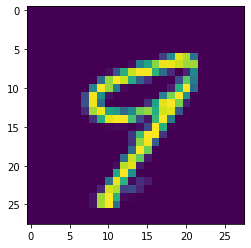

In [21]:
plt.imshow(X_train[0].reshape(28,28))      #.reshap(28,28)하면 화면출력해서 그림 나옴

In [22]:
Y_train[0]

9

In [23]:
Y_train[:20]

array([9, 2, 9, 6, 0, 4, 6, 4, 9, 9, 1, 9, 8, 1, 9, 0, 1, 5, 1, 9],
      dtype=uint8)

In [25]:
Y_train.shape,Y_val.shape,Y_test.shape

((700,), (300,), (10000,))

In [27]:
# 원 핫 인코딩 = 라벨링 전환 
# 0  => 1 0 0 0 0 0 0 0 0 0
# 3 => 0 0 0 1 0 0 0 0 0 0 
Y_train =  utils.to_categorical(Y_train)
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

In [28]:
Y_train.shape, Y_val.shape,Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [29]:
Y_train[0]
# 데이터 전치리 끝 #######################################################################

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 2. 모델 구성하기

In [30]:
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))  #layer output 2개 
model.add(Dense(units=10, activation="softmax"))

# 3. 모델 학습과정 설정

In [31]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics=['accuracy'])

# 4. 모델 학습 시키기

In [32]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val,Y_val))  #val_accuracy (이 데이터의 accuracy)

Epoch 1/1000
70/70 [==============================] - 1s 4ms/step - loss: 2.2746 - accuracy: 0.1115 - val_loss: 2.2478 - val_accuracy: 0.1033
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2240 - accuracy: 0.1493 - val_loss: 2.1927 - val_accuracy: 0.1333
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1745 - accuracy: 0.1595 - val_loss: 2.1448 - val_accuracy: 0.1767
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1013 - accuracy: 0.2380 - val_loss: 2.1116 - val_accuracy: 0.2500
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0754 - accuracy: 0.2698 - val_loss: 2.0769 - val_accuracy: 0.2767
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0295 - accuracy: 0.3034 - val_loss: 2.0451 - val_accuracy: 0.2867
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9890 - accuracy: 0.2897 - val_loss: 2.0263 - val_accuracy: 0.2833
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 1.3293 - accuracy: 0.5024 - val_loss: 1.5337 - val_accuracy: 0.4167
Epoch 59/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3747 - accuracy: 0.4562 - val_loss: 1.5364 - val_accuracy: 0.4133
Epoch 60/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3641 - accuracy: 0.4715 - val_loss: 1.5354 - val_accuracy: 0.4300
Epoch 61/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3416 - accuracy: 0.4864 - val_loss: 1.5251 - val_accuracy: 0.4233
Epoch 62/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2607 - accuracy: 0.5208 - val_loss: 1.5262 - val_accuracy: 0.4267
Epoch 63/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.3049 - accuracy: 0.5004 - val_loss: 1.5534 - val_accuracy: 0.4133
Epoch 64/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.2839 - accuracy: 0.5131 - val_loss: 1.5276 - val_accuracy: 0.4433
Epoch 65/1000

Epoch 172/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0155 - accuracy: 0.6419 - val_loss: 1.5488 - val_accuracy: 0.4933
Epoch 173/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0324 - accuracy: 0.6339 - val_loss: 1.5595 - val_accuracy: 0.5033
Epoch 174/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9474 - accuracy: 0.6494 - val_loss: 1.5509 - val_accuracy: 0.5067
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9785 - accuracy: 0.6520 - val_loss: 1.5671 - val_accuracy: 0.4967
Epoch 176/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9931 - accuracy: 0.6373 - val_loss: 1.5582 - val_accuracy: 0.5000
Epoch 177/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0335 - accuracy: 0.5948 - val_loss: 1.5775 - val_accuracy: 0.5000
Epoch 178/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9641 - accuracy: 0.6494 - val_loss: 1.5890 - val_accuracy:

Epoch 229/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9486 - accuracy: 0.6851 - val_loss: 1.6327 - val_accuracy: 0.4933
Epoch 230/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8687 - accuracy: 0.6670 - val_loss: 1.6766 - val_accuracy: 0.4900
Epoch 231/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9161 - accuracy: 0.6844 - val_loss: 1.6425 - val_accuracy: 0.4900
Epoch 232/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9263 - accuracy: 0.6579 - val_loss: 1.6695 - val_accuracy: 0.4900
Epoch 233/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9437 - accuracy: 0.6672 - val_loss: 1.6477 - val_accuracy: 0.4867
Epoch 234/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9164 - accuracy: 0.6725 - val_loss: 1.6387 - val_accuracy: 0.4900
Epoch 235/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9243 - accuracy: 0.6640 - val_loss: 1.6653 - val_accuracy:

Epoch 286/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8444 - accuracy: 0.6891 - val_loss: 1.7643 - val_accuracy: 0.4867
Epoch 287/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8613 - accuracy: 0.7036 - val_loss: 1.7504 - val_accuracy: 0.4833
Epoch 288/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9051 - accuracy: 0.6788 - val_loss: 1.7438 - val_accuracy: 0.4900
Epoch 289/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8570 - accuracy: 0.6959 - val_loss: 1.7380 - val_accuracy: 0.4867
Epoch 290/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8779 - accuracy: 0.6757 - val_loss: 1.7540 - val_accuracy: 0.4800
Epoch 291/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8588 - accuracy: 0.6911 - val_loss: 1.7662 - val_accuracy: 0.4900
Epoch 292/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7937 - accuracy: 0.7353 - val_loss: 1.7797 - val_accuracy:

Epoch 343/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8052 - accuracy: 0.7010 - val_loss: 1.8443 - val_accuracy: 0.4800
Epoch 344/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8501 - accuracy: 0.6947 - val_loss: 1.8439 - val_accuracy: 0.4833
Epoch 345/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7704 - accuracy: 0.7485 - val_loss: 1.8517 - val_accuracy: 0.4867
Epoch 346/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8264 - accuracy: 0.7119 - val_loss: 1.8492 - val_accuracy: 0.4800
Epoch 347/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8135 - accuracy: 0.7132 - val_loss: 1.8483 - val_accuracy: 0.4800
Epoch 348/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8483 - accuracy: 0.7278 - val_loss: 1.8629 - val_accuracy: 0.4867
Epoch 349/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8658 - accuracy: 0.7128 - val_loss: 1.8643 - val_accuracy:

Epoch 400/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8021 - accuracy: 0.7237 - val_loss: 1.9717 - val_accuracy: 0.4700
Epoch 401/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7977 - accuracy: 0.7512 - val_loss: 1.9559 - val_accuracy: 0.4767
Epoch 402/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7702 - accuracy: 0.7109 - val_loss: 1.9754 - val_accuracy: 0.4633
Epoch 403/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8082 - accuracy: 0.7068 - val_loss: 1.9712 - val_accuracy: 0.4733
Epoch 404/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7640 - accuracy: 0.7244 - val_loss: 1.9850 - val_accuracy: 0.4833
Epoch 405/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8066 - accuracy: 0.7119 - val_loss: 2.0011 - val_accuracy: 0.4733
Epoch 406/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.7387 - val_loss: 1.9626 - val_accuracy:

Epoch 457/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7907 - accuracy: 0.7507 - val_loss: 2.0663 - val_accuracy: 0.4733
Epoch 458/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8037 - accuracy: 0.7364 - val_loss: 2.0226 - val_accuracy: 0.4700
Epoch 459/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8199 - accuracy: 0.7127 - val_loss: 2.0642 - val_accuracy: 0.4733
Epoch 460/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7687 - accuracy: 0.7294 - val_loss: 2.0821 - val_accuracy: 0.4767
Epoch 461/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7425 - accuracy: 0.7428 - val_loss: 2.0468 - val_accuracy: 0.4733
Epoch 462/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7425 - accuracy: 0.7614 - val_loss: 2.0796 - val_accuracy: 0.4667
Epoch 463/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7469 - accuracy: 0.7621 - val_loss: 2.0468 - val_accuracy:

Epoch 514/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7474 - accuracy: 0.7356 - val_loss: 2.1317 - val_accuracy: 0.4800
Epoch 515/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7747 - accuracy: 0.7163 - val_loss: 2.1677 - val_accuracy: 0.4633
Epoch 516/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7628 - accuracy: 0.7482 - val_loss: 2.1696 - val_accuracy: 0.4633
Epoch 517/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7243 - accuracy: 0.7487 - val_loss: 2.1759 - val_accuracy: 0.4700
Epoch 518/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7246 - accuracy: 0.7572 - val_loss: 2.1665 - val_accuracy: 0.4767
Epoch 519/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.7452 - val_loss: 2.1907 - val_accuracy: 0.4533
Epoch 520/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.7431 - val_loss: 2.1729 - val_accuracy:

Epoch 571/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.7697 - val_loss: 2.2841 - val_accuracy: 0.4633
Epoch 572/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.7709 - val_loss: 2.2848 - val_accuracy: 0.4467
Epoch 573/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7476 - accuracy: 0.7518 - val_loss: 2.2851 - val_accuracy: 0.4733
Epoch 574/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.7667 - val_loss: 2.2875 - val_accuracy: 0.4600
Epoch 575/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7432 - accuracy: 0.7500 - val_loss: 2.2663 - val_accuracy: 0.4733
Epoch 576/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7166 - accuracy: 0.7551 - val_loss: 2.2748 - val_accuracy: 0.4800
Epoch 577/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6811 - accuracy: 0.7729 - val_loss: 2.2857 - val_accuracy:

Epoch 628/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6683 - accuracy: 0.7858 - val_loss: 2.3648 - val_accuracy: 0.4600
Epoch 629/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.7625 - val_loss: 2.3618 - val_accuracy: 0.4633
Epoch 630/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7046 - accuracy: 0.7721 - val_loss: 2.3709 - val_accuracy: 0.4433
Epoch 631/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.7605 - val_loss: 2.3609 - val_accuracy: 0.4567
Epoch 632/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.7655 - val_loss: 2.3779 - val_accuracy: 0.4433
Epoch 633/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.7545 - val_loss: 2.3494 - val_accuracy: 0.4600
Epoch 634/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.7729 - val_loss: 2.3983 - val_accuracy:

Epoch 685/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.7586 - val_loss: 2.4572 - val_accuracy: 0.4667
Epoch 686/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.7538 - val_loss: 2.4742 - val_accuracy: 0.4700
Epoch 687/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.7896 - val_loss: 2.4385 - val_accuracy: 0.4667
Epoch 688/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.7732 - val_loss: 2.4550 - val_accuracy: 0.4533
Epoch 689/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.7669 - val_loss: 2.4569 - val_accuracy: 0.4600
Epoch 690/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6975 - accuracy: 0.7635 - val_loss: 2.4740 - val_accuracy: 0.4600
Epoch 691/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7219 - accuracy: 0.7452 - val_loss: 2.4656 - val_accuracy:

Epoch 742/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7833 - val_loss: 2.5216 - val_accuracy: 0.4567
Epoch 743/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.7827 - val_loss: 2.5739 - val_accuracy: 0.4600
Epoch 744/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.7877 - val_loss: 2.5408 - val_accuracy: 0.4600
Epoch 745/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.7754 - val_loss: 2.5635 - val_accuracy: 0.4633
Epoch 746/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7115 - accuracy: 0.7341 - val_loss: 2.5359 - val_accuracy: 0.4700
Epoch 747/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.7931 - val_loss: 2.5511 - val_accuracy: 0.4633
Epoch 748/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6758 - accuracy: 0.7446 - val_loss: 2.5592 - val_accuracy:

Epoch 799/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.7645 - val_loss: 2.6119 - val_accuracy: 0.4633
Epoch 800/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.7681 - val_loss: 2.6291 - val_accuracy: 0.4500
Epoch 801/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.7765 - val_loss: 2.6579 - val_accuracy: 0.4600
Epoch 802/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.8011 - val_loss: 2.6292 - val_accuracy: 0.4567
Epoch 803/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.7884 - val_loss: 2.6666 - val_accuracy: 0.4600
Epoch 804/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.7893 - val_loss: 2.6591 - val_accuracy: 0.4600
Epoch 805/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.7718 - val_loss: 2.6304 - val_accuracy:

Epoch 856/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7865 - val_loss: 2.7339 - val_accuracy: 0.4533
Epoch 857/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.8046 - val_loss: 2.7137 - val_accuracy: 0.4567
Epoch 858/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6528 - accuracy: 0.7642 - val_loss: 2.7231 - val_accuracy: 0.4533
Epoch 859/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.8000 - val_loss: 2.7080 - val_accuracy: 0.4533
Epoch 860/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7877 - val_loss: 2.7179 - val_accuracy: 0.4500
Epoch 861/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.7779 - val_loss: 2.7128 - val_accuracy: 0.4533
Epoch 862/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.7983 - val_loss: 2.7267 - val_accuracy:

Epoch 913/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.8007 - val_loss: 2.8091 - val_accuracy: 0.4500
Epoch 914/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6097 - accuracy: 0.7943 - val_loss: 2.8146 - val_accuracy: 0.4500
Epoch 915/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7800 - val_loss: 2.8442 - val_accuracy: 0.4567
Epoch 916/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6314 - accuracy: 0.7832 - val_loss: 2.8196 - val_accuracy: 0.4533
Epoch 917/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5766 - accuracy: 0.8142 - val_loss: 2.8196 - val_accuracy: 0.4600
Epoch 918/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.7880 - val_loss: 2.8449 - val_accuracy: 0.4567
Epoch 919/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.7759 - val_loss: 2.8334 - val_accuracy:

# 5. 모델학습과정 표시하고 평가하기 

In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

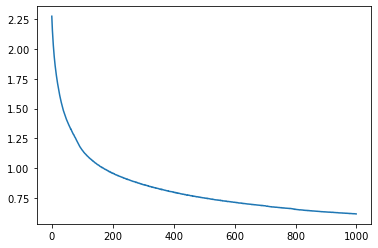

In [33]:
plt.plot(hist.history['loss'])

## 5.1 학습과정 표시하기

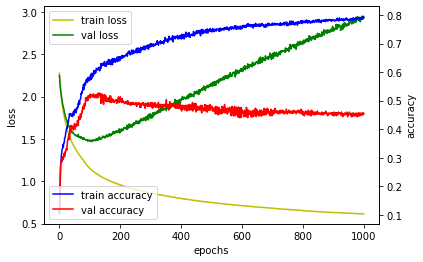

In [37]:
#학습과정 표시하기 
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y',label="train loss")
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')   #val_loss 검증셋 데이어틔 loss   #200번이 넘어가면서 너무 과적합해서 loss가 높아져. 회귀선과 더 멀어짐
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()  #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'],'r', label="val accuracy") # accuracy 저조함. 좋은 model 아님.
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")


## 5.2 모델 평가하기

In [38]:
loss_and_metrics = model.evaluate(X_test,Y_test, batch_size=32) 

313/313 [==============================] - 0s 902us/step - loss: 2.8772 - accuracy: 0.4572


In [39]:
print("loss:",loss_and_metrics[0])
print("accuracy:",loss_and_metrics[1])

loss: 2.8772237300872803
accuracy: 0.45719999074935913


# 6. 모델 저장 및 로드 하기 

In [40]:
model.save("model/mnist.h5")  #모델 저장 확장자 반드시 h5

In [41]:
model.summary() #1600개의 parameter가 위 파일에 저장됨 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


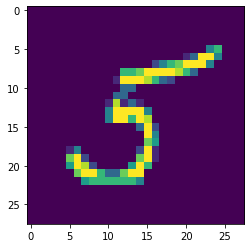

In [56]:
plt.imshow(X_val[3].reshape(28,28))

In [58]:
result = model2.predict(X_val[3].reshape(1,784))   #784= 28x28   데이터를1차원으로 한꺼번에 
print(result)
result.argmax()  #3번째 방이 제일큼 

[[2.8426542e-16 7.6384978e-08 1.2891388e-16 6.1608213e-01 3.0301299e-13
  3.7959701e-01 2.9767171e-21 2.7831702e-14 7.7697320e-04 3.5438894e-03]]


3

In [60]:
Y_val[3].argmax()    #train data가 비교적 잘 맞추고, val data가 잘 못맞춰   # 그 다음 5번째 방이 제일큼    (큰 확율 순!!!!!!!) 그러나 잘못맞춤

5

argmax를 하거나 predict_classes를 한다

In [61]:
model2.predict_classes(X_val[0].reshape(1,784))

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6], dtype=int64)

# 콜백 함수 
- 과적합 전 끝내는것

In [5]:
import tensorflow as tf
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):   #Callback으로 부터 상속 받은 CustomHistory
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []  # 변수를 만들어줌
        self.val_acc = [] 
    def on_epoch_end(self,batch,logs={}):   #Callback안에 있는 함수 override. 한 epoch끝날때 마다 logs에있는 loss를 train_loss에  apppend,#logs에있는 loss를 val_loss에  apppend
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy')) 
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:  #10으로 나누어지면
            print("epoch:{}, loss:{},val_loss:{}".format(self.epoch,logs.get('loss'),logs.get('val_loss')
                                                        ))
        self.epoch += 1  #epoch 하나씩 늘고 

# 1. 데이터 셋 준비하기 
# 훈련셋, 검증셋 분리 
(X_train, Y_train), (X_test,Y_test) = mnist.load_data() 

# 훈련셋과 검증셋 분리  (X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]  #50000개부터 끝까지 
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
        
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32')/255.0    #0부터255너무떨어져있어서 나눠서 normalization ***
X_val = X_val.reshape(10000,784).astype('float32')/255.0  # '데이터 784개' 한꺼번에 1차원으로 들어가  *******************************************
X_test = X_test.reshape(10000,784).astype('float32')/255.0 
        

# 훈련셋과 검증셋 700개, 300개씩만 가져옴 
#1부터50000까지 700개를 random하게 뽑자
train_rand_idxs = np.random.choice(50000,700) 
val_rand_idxs = np.random.choice(10000,300) 
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
#300개의 index만 사용
X_val = X_val[val_rand_idxs]      #X_val, Y_val이 같아야   
Y_val = Y_val[val_rand_idxs]   
    
# 원 핫 인코딩 = 라벨링 전환 
# 0  => 1 0 0 0 0 0 0 0 0 0
# 3 => 0 0 0 1 0 0 0 0 0 0 
Y_train =  utils.to_categorical(Y_train)    # to_categorical사용하여면 () 안에 변수는 '숫자'여야
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)    

#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))  #layer output 2개 
model.add(Dense(units=10, activation="softmax"))

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics=['accuracy'])


#4.모델학습시키기
custom_hist = CustomHistory()  # 일반 메소드(self)가 호출되려면, '객체'가 만들어져야 *****************8
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val,Y_val), verbose=0,
                callbacks=[custom_hist])  #val_accuracy (이 데이터의 accuracy)  #custom_hist안에 있는것 자동 실행  verbose=0꼭 넣어야 효과가 나타남 
                #callbacks=[custom_hist]이렇게 하면 1000번 뿌리게됨 ********************우리가 원하는 것은 과적합전에 조기종료
#loss가 늘어나고 있다. 과적합이 되어가고 있음 

epoch:0, loss:2.27363657951355,val_loss:2.2613964080810547
epoch:10, loss:2.0432112216949463,val_loss:2.0891339778900146
epoch:20, loss:1.6864959001541138,val_loss:1.7343831062316895
epoch:30, loss:1.4752174615859985,val_loss:1.5322518348693848
epoch:40, loss:1.3572018146514893,val_loss:1.4546211957931519
epoch:50, loss:1.2775120735168457,val_loss:1.3961310386657715
epoch:60, loss:1.219902753829956,val_loss:1.365174651145935
epoch:70, loss:1.1708508729934692,val_loss:1.3441760540008545
epoch:80, loss:1.1309314966201782,val_loss:1.3395460844039917
epoch:90, loss:1.1003856658935547,val_loss:1.3274224996566772
epoch:100, loss:1.0735549926757812,val_loss:1.3195595741271973
epoch:110, loss:1.0487405061721802,val_loss:1.3278790712356567
epoch:120, loss:1.0258347988128662,val_loss:1.3181134462356567
epoch:130, loss:1.0057474374771118,val_loss:1.3184642791748047
epoch:140, loss:0.9875425696372986,val_loss:1.325779676437378
epoch:150, loss:0.9711853861808777,val_loss:1.334330677986145
epoch:160

In [4]:
custom_hist = CustomHistory() 
custom_hist.epoch

0

# <2>Eraly Stopping
- 199번이 198번과 비교했을때 더 크면 stop (과적합 stop)
- **from tensorflow.keras.callbacks import EarlyStopping**

Epoch 1/1000
70/70 [==============================] - 1s 3ms/step - loss: 2.3019 - accuracy: 0.0641 - val_loss: 2.2946 - val_accuracy: 0.0400
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2837 - accuracy: 0.0693 - val_loss: 2.2559 - val_accuracy: 0.0900
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2411 - accuracy: 0.1081 - val_loss: 2.2223 - val_accuracy: 0.1000
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1866 - accuracy: 0.1473 - val_loss: 2.1983 - val_accuracy: 0.1667
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1685 - accuracy: 0.1356 - val_loss: 2.1752 - val_accuracy: 0.1767
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1303 - accuracy: 0.2303 - val_loss: 2.1516 - val_accuracy: 0.1833
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1113 - accuracy: 0.2057 - val_loss: 2.1211 - val_accuracy: 0.1633
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 0.9927 - accuracy: 0.6142 - val_loss: 1.4638 - val_accuracy: 0.4767
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0375 - accuracy: 0.5960 - val_loss: 1.4779 - val_accuracy: 0.5000


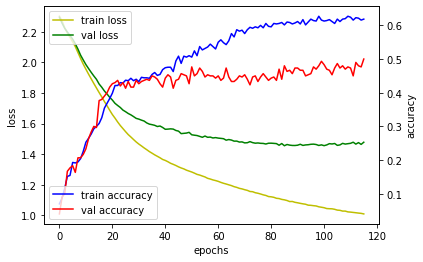

In [10]:
#199번이 198번과 비교했을때 더 크면 stop (과적합 stop)

import tensorflow as tf
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):   #Callback으로 부터 상속 받은 CustomHistory
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []  # 변수를 만들어줌
        self.val_acc = [] 
    def on_epoch_end(self,batch,logs={}):   #Callback안에 있는 함수 override. 한 epoch끝날때 마다 logs에있는 loss를 train_loss에  apppend,#logs에있는 loss를 val_loss에  apppend
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy')) 
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:  #10으로 나누어지면
            print("epoch:{}, loss:{},val_loss:{}".format(self.epoch,logs.get('loss'),logs.get('val_loss')
                                                        ))
        self.epoch += 1  #epoch 하나씩 늘고 

# 1. 데이터 셋 준비하기 
# 훈련셋, 검증셋 분리 
(X_train, Y_train), (X_test,Y_test) = mnist.load_data() 

# 훈련셋과 검증셋 분리  (X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]  #50000개부터 끝까지 
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
        
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32')/255.0    #0부터255너무떨어져있어서 나눠서 normalization ***
X_val = X_val.reshape(10000,784).astype('float32')/255.0  # '데이터 784개' 한꺼번에 1차원으로 들어가  *******************************************
X_test = X_test.reshape(10000,784).astype('float32')/255.0 
        

# 훈련셋과 검증셋 700개, 300개씩만 가져옴 
#1부터50000까지 700개를 random하게 뽑자
train_rand_idxs = np.random.choice(50000,700) 
val_rand_idxs = np.random.choice(10000,300) 
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
#300개의 index만 사용
X_val = X_val[val_rand_idxs]      #X_val, Y_val이 같아야   
Y_val = Y_val[val_rand_idxs]   
    
# 원 핫 인코딩 = 라벨링 전환 
# 0  => 1 0 0 0 0 0 0 0 0 0
# 3 => 0 0 0 1 0 0 0 0 0 0 
Y_train =  utils.to_categorical(Y_train)    # to_categorical사용하여면 () 안에 변수는 '숫자'여야
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)    

#2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation="relu"))  #layer output 2개 
model.add(Dense(units=10, activation="softmax"))

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics=['accuracy'])


#4.모델학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()  # 성급한 조기 종료 *********************************************
early_stopping = EarlyStopping(patience=30) #patience인자 수 만큼 Loss가 오를 수 있음. 적절한 조기종료 *********#val_loss 20번 늘어나느 것을 허용**************************
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val,Y_val), verbose=1,
                callbacks=[early_stopping]) # 조기 종료 ****************************************************


#5.학습과정 표시하기 
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y',label="train loss")
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')   #val_loss 검증셋 데이어틔 loss   #200번이 넘어가면서 너무 과적합해서 loss가 높아져. 회귀선과 더 멀어짐
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()  #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'],'r', label="val accuracy") # accuracy 저조함. 좋은 model 아님.
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")

# graph를 보면 val_loss살짝 올라가는 것 용납못해서 바로 끊어버림  (그러나 이것은 성급한 조기 종료) 
# ==> 개선:  약간 올라갔다 내려갔다 거릴 수도 있다. 이것까지는 봐주고 끊어버는 것이 좋다. 그 뒤에 또 올라가 그러면 끊어버림  (적절한 조기종료)



In [ ]:
# patience= 50번  완만하게 올라간다. 그러면 다시  30번으로 줄여. 적절한 조기 종료

In [ ]:
#verbose = 1, which includes both progress bar and one line per epoch. 
#verbose = 0, means silent. 
#verbose = 2, one line per epoch i.e. epoch no./total no. of epochs.

In [11]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print()
print('loss_and_metrics:', loss_and_metrics)

313/313 [==============================] - 0s 894us/step - loss: 1.4560 - accuracy: 0.5006

loss_and_metrics: [1.4560354948043823, 0.5005999803543091]


In [15]:
#7. 모델 사용하기 
idx = np.random.choice(X_test.shape[0],5)  #10000개 (X_test.shape[0]) 중  5개만 뽑아라

In [19]:
xhat = X_test[idx]
xhat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
yhat= model.predict(xhat) #xhat을 넣으면 결과가 뭐니
yhat
#0일 확률 8.93e-03   1일 확률 2.98    2일확률 0.81

array([[8.9311994e-05, 2.9810168e-02, 8.1240898e-03, 1.7379250e-01,
        1.5859904e-06, 3.8357171e-01, 3.5275989e-05, 2.8906221e-04,
        4.0269127e-01, 1.5949660e-03],
       [5.2720035e-05, 9.1762738e-03, 5.9487233e-03, 2.3405357e-01,
        4.6358974e-08, 3.6953133e-01, 1.1871423e-06, 7.6916192e-05,
        3.8082126e-01, 3.3805173e-04],
       [8.8899069e-02, 1.7044485e-03, 2.4195345e-01, 2.5306188e-02,
        1.5032665e-02, 2.5361225e-02, 6.3052721e-04, 4.1532573e-01,
        2.6024336e-02, 1.5976235e-01],
       [8.8976383e-01, 7.2064763e-12, 1.0643570e-01, 1.7951272e-03,
        1.6439518e-13, 1.7114102e-05, 2.0844842e-18, 1.9729910e-03,
        1.4009773e-05, 1.2589932e-06],
       [5.3345636e-02, 4.0882155e-03, 1.7948580e-01, 2.1631831e-02,
        4.8758999e-02, 2.9018806e-02, 3.4902259e-03, 3.9886746e-01,
        3.0199461e-02, 2.3111355e-01]], dtype=float32)

In [30]:
np.argmax(yhat,axis=1) #예측치        # axis=1  열은 고정시키고 행에서 비교  
                                      # 1st array안에서 8번째 방의 숫이 가장 크다   2nd array안에서  8번째 방의 숫이 가장 크다 

array([8, 8, 7, 0, 7], dtype=int64)

In [31]:
np.argmax(Y_test[idx],axis=1) #실제값

array([3, 5, 7, 0, 6], dtype=int64)

In [32]:
for i in range(5):
    print(i,"번째 실제값:",np.argmax(Y_test[idx][i]), #왜 axis=1넣으면 안되는 이유: Y_test[idx] 가 1차원
         "\t예측값:",np.argmax(yhat[i]))

0 번째 실제값: 3 	예측값: 8
1 번째 실제값: 5 	예측값: 8
2 번째 실제값: 7 	예측값: 7
3 번째 실제값: 0 	예측값: 0
4 번째 실제값: 6 	예측값: 7


In [36]:
# 위 확인용
Y_test[1]        
# 확인용 끝             #1차원 배열. 따라서 1차원이기에 np.argmax(Y_test[idx][i]) 뒤에 axis=1를 넣치 않는다. 아니면 에러 발생

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
#8. 모델 저장하기
model.save('model/mnist.h5')

In [25]:
#9. 모델 재사용하기 
from tensorflow.keras.models import load_model 
model2 = load_model("model/mnist.h5")
model2.predict_classes(xhat) #  predict_classes예측한 결과를 원핫인코딩을 풀어서 출력

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([8, 8, 7, 0, 7], dtype=int64)

# <3> 위 모델(DNN - deep neural network)의 accuracy 늘리기
<ol>
    <li> 데이터 확보 </li>
    <li> 레이어 </li>
    <li> 활성화 함수: 은닉층에는 주로 relu, elu,
                       맨 마지막 output 층에서는 sigmoid (이진분류), softmax(다중분류)</li>
    <li> optimizer, epoch 등을 조정 </li>

Epoch 1/50
5000/5000 [==============================] - 37s 7ms/step - loss: 0.6608 - accuracy: 0.8221 - val_loss: 0.1913 - val_accuracy: 0.9452
Epoch 2/50
5000/5000 [==============================] - 37s 7ms/step - loss: 0.1635 - accuracy: 0.9519 - val_loss: 0.1261 - val_accuracy: 0.9646
Epoch 3/50
5000/5000 [==============================] - 37s 7ms/step - loss: 0.1079 - accuracy: 0.9683 - val_loss: 0.1113 - val_accuracy: 0.9665
Epoch 4/50
5000/5000 [==============================] - 36s 7ms/step - loss: 0.0812 - accuracy: 0.9767 - val_loss: 0.0962 - val_accuracy: 0.9717
Epoch 5/50
5000/5000 [==============================] - 36s 7ms/step - loss: 0.0599 - accuracy: 0.9828 - val_loss: 0.0861 - val_accuracy: 0.9751
Epoch 6/50
5000/5000 [==============================] - 35s 7ms/step - loss: 0.0487 - accuracy: 0.9862 - val_loss: 0.0813 - val_accuracy: 0.9773
Epoch 7/50
5000/5000 [==============================] - 36s 7ms/step - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.0805 - val_ac

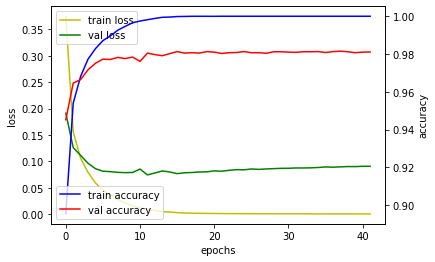

In [7]:
#199번이 198번과 비교했을때 더 크면 stop (과적합 stop)

import tensorflow as tf
np.random.seed(3)
class CustomHistory(tf.keras.callbacks.Callback):   #Callback으로 부터 상속 받은 CustomHistory
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []  # 변수를 만들어줌
        self.val_acc = [] 
    def on_epoch_end(self,batch,logs={}):   #Callback안에 있는 함수 override. 한 epoch끝날때 마다 logs에있는 loss를 train_loss에  apppend,#logs에있는 loss를 val_loss에  apppend
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy')) 
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:  #10으로 나누어지면
            print("epoch:{}, loss:{},val_loss:{}".format(self.epoch,logs.get('loss'),logs.get('val_loss')
                                                        ))
        self.epoch += 1  #epoch 하나씩 늘고 

# 1. 데이터 셋 준비하기 
# 훈련셋, 검증셋 분리 
(X_train, Y_train), (X_test,Y_test) = mnist.load_data() 

# 훈련셋과 검증셋 분리  (X_train, Y_train을 검증셋과 훈련셋으로 분리)
X_val = X_train[50000:]  #50000개부터 끝까지 
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
        
# normalize 하기 위해 색상값으로 나눠
X_train = X_train.reshape(50000,784).astype('float32')/255.0    #0부터255너무떨어져있어서 나눠서 normalization ***
X_val = X_val.reshape(10000,784).astype('float32')/255.0  # '데이터 784개' 한꺼번에 1차원으로 들어가  *******************************************
X_test = X_test.reshape(10000,784).astype('float32')/255.0 
        

# 훈련셋과 검증셋 700개, 300개씩만 가져옴 
#1부터50000까지 700개를 random하게 뽑자
# train_rand_idxs = np.random.choice(50000,700) 
# val_rand_idxs = np.random.choice(10000,300) 
# X_train = X_train[train_rand_idxs]
# Y_train = Y_train[train_rand_idxs]
# #300개의 index만 사용
# X_val = X_val[val_rand_idxs]      #X_val, Y_val이 같아야   
# Y_val = Y_val[val_rand_idxs]   
    
    
# 원 핫 인코딩 = 라벨링 전환 
# 0  => 1 0 0 0 0 0 0 0 0 0
# 3 => 0 0 0 1 0 0 0 0 0 0 
Y_train =  utils.to_categorical(Y_train)    # to_categorical사용하여면 () 안에 변수는 '숫자'여야
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)    

#2. 모델 구성하기        *****************************accuracy늘리기 ***********************************
model = Sequential()
model.add(Dense(units=612, input_dim=784, activation="relu"))  
model.add(Dense(units=1300, input_dim=784, activation="relu"))  
model.add(Dense(units=258, input_dim=784, activation="relu"))  
model.add(Dense(units=10, activation="softmax"))

#3. 모델 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics=['accuracy'])


#4.모델학습시키기
from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping()  # 성급한 조기 종료 
early_stopping = EarlyStopping(patience=30) #patience인자 수 만큼 Loss가 오를 수 있음. 적절한 조기종료 *********#val_loss 20번 늘어나느 것을 허용**************************
hist = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_val,Y_val), verbose=1,
                callbacks=[early_stopping]) # 조기 종료     #batch_size=10은   10개를 1개로봄 

#5.학습과정 표시하기 
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y',label="train loss")
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')   #val_loss 검증셋 데이어틔 loss   #200번이 넘어가면서 너무 과적합해서 loss가 높아져. 회귀선과 더 멀어짐
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()  #x축을 공유하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b', label="train accuracy")
acc_ax.plot(hist.history['val_accuracy'],'r', label="val accuracy") # accuracy 저조함. 좋은 model 아님.
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")



In [ ]:
# 7. 모델 사용 및 평가
idx = np.random.choice(X_test.shape[0],5)
xhat= X_test[idx]
yhat = model.predict_classes(xhat)

In [ ]:
# 8. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print("loss:",loss_and_metrics[0])
print("accuracy:",loss_and_metrics[1])

In [ ]:
#9. 모델 저장
model.save('model/mnist_v1.h5')